In [15]:
#pakage for analysis
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

#pakage for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

#allows charts to appear in the notebook
%matplotlib inline

#pickle pakage
import pickle


In [3]:
df = pd.read_csv('cars.csv')
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,Toyota
1,31.9,4,89,71,1925,14,1980,Honda
2,17.0,8,302,140,3449,11,1971,Toyota
3,15.0,8,400,150,3761,10,1971,Toyota
4,30.5,4,98,63,2051,17,1978,Toyota
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,Toyota
257,36.1,4,91,60,1800,16,1979,Nissan
258,22.0,6,232,112,2835,15,1983,Toyota
259,18.0,6,232,100,3288,16,1972,Toyota


In [4]:
X = df[:-1]
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,Toyota
1,31.9,4,89,71,1925,14,1980,Honda
2,17.0,8,302,140,3449,11,1971,Toyota
3,15.0,8,400,150,3761,10,1971,Toyota
4,30.5,4,98,63,2051,17,1978,Toyota


In [13]:
#print(df.columns[:-1])

X = df[df.columns[:-1]]
X = X._convert(numeric=True)
X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980
257,36.1,4,91.0,60,1800.0,16,1979
258,22.0,6,232.0,112,2835.0,15,1983
259,18.0,6,232.0,100,3288.0,16,1972


In [14]:
#Eliminating null values
for i in X.columns:
  X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
  print(X[i].isnull().sum())

0
0
0
0
0
0
0


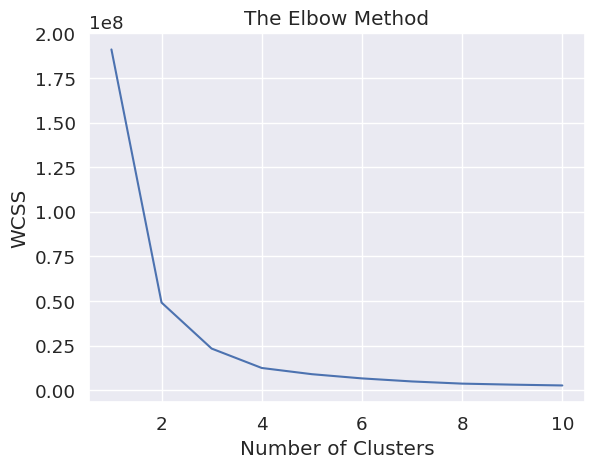

In [22]:
#Using the Elbow method to find the optimal number of clusters

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) #init: how to pick its centroids to start with is
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
#Applying the k-means to the cars dataset

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
X = X.values

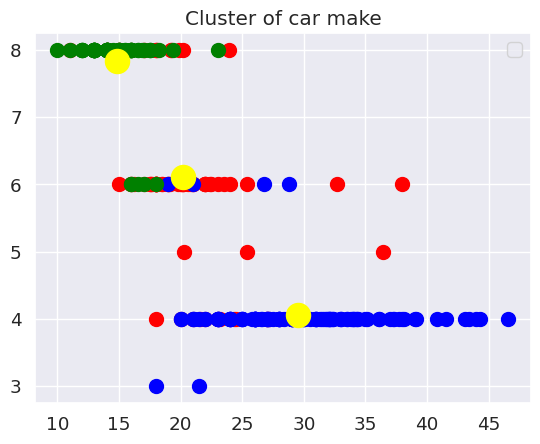

In [33]:
from ipywidgets.widgets.widget_string import Label
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red') #, Label='Toyota'
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue') #, Label='Nissan'
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green') #, Label='Honda'
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow') #, label='Centroids'
plt.title('Cluster of car make')
plt.legend()
plt.show()